In [1]:
! pip install numpy opencv-python matplotlib

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [22]:
# Read an image from the path using OpenCV
img = cv.imread('messi.png')
cv.imshow('Messi', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
# Resizing the image to its half the width and half the height using resize()
res = cv.resize(img, None, fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)

# Show the image
cv.imshow('Resized Image', res)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
# Resizing the image to its half the width and half the height using resize()
h, w = img.shape[:2]
img = cv.resize(img,(w//2, h//2), interpolation = cv.INTER_CUBIC)

# Show the image
cv.imshow('Resized Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
# Translate the image 100px right and 50px down
rows,cols,width = img.shape
M = np.float32([[1,0,100],[0,1,50]])

# To get full image add the translated value with row and col
dst = cv.warpAffine(img,M,(cols + 100,rows + 50)) 

# Show the image
cv.imshow('Translated Image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
# Rotate the image to 90 degrees
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

# Show the image
cv.imshow('Rotated Image', dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
# Affine Transformation
img2 = cv.imread('drawing.png')
rows2,cols2,width2 = img2.shape

#Selecting two points
pts1 = np.float32([[20,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

# Making the Affine Transformation Matrix
M = cv.getAffineTransform(pts1,pts2)

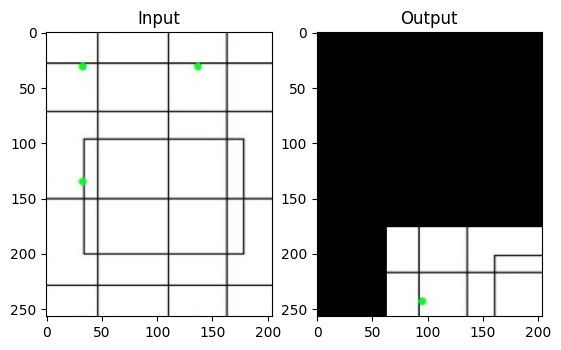

In [27]:
# Affine Transformed Image
dst = cv.warpAffine(img2,M,(cols2,rows2))

# Show as Subplots
plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [29]:
img3 = cv.imread('sudoku.png')

rows3,cols3,ch3 = img3.shape
pts1 = np.float32([[26,32],[183,27],[12,190],[193,190]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])

M = cv.getPerspectiveTransform(pts1,pts2)

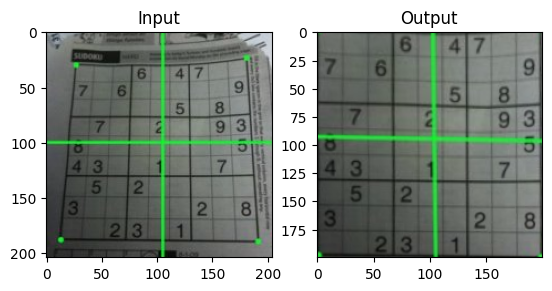

In [30]:
dst = cv.warpPerspective(img3,M,(200,200))
plt.subplot(121),plt.imshow(img3),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [12]:
# Saving the image
cv.imwrite('output.png', dst)

True

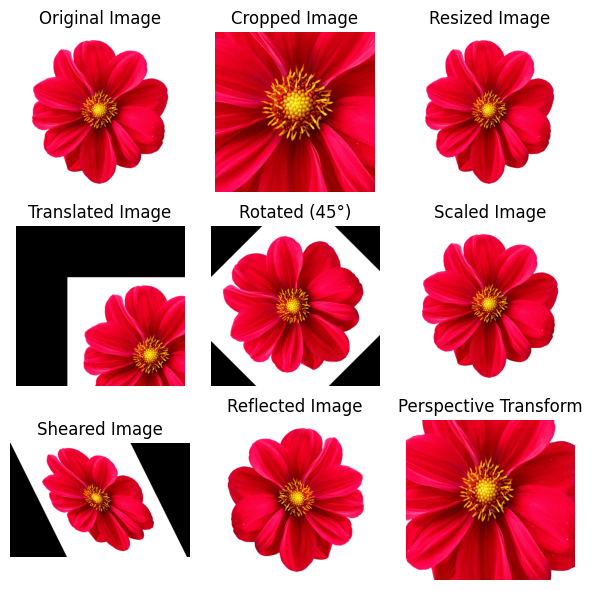

In [ ]:
# Read image and convert from BGR to RGB for Matplotlib
img4 = cv.imread('flower.png')
img_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

# Get image dimensions
rows4, cols4 = img4.shape[:2]

# Create a 3x3 figure layout
plt.figure("Image Transformations", figsize=(6, 6))

# --------------------------------------------------
# 1. Original Image
# --------------------------------------------------
plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# --------------------------------------------------
# 2. Cropped Image
# --------------------------------------------------
# Crop a central region of the image
cropped = img4[400:1200, 400:1200]
cropped_rgb = cv.cvtColor(cropped, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 2)
plt.imshow(cropped_rgb)
plt.title("Cropped Image")
plt.axis("off")

# --------------------------------------------------
# 3. Resized Image
# --------------------------------------------------
# Resize image to fixed dimensions
resized = cv.resize(img4, (500, 500))
resized_rgb = cv.cvtColor(resized, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 3)
plt.imshow(resized_rgb)
plt.title("Resized Image")
plt.axis("off")

# --------------------------------------------------
# 4. Translated Image
# --------------------------------------------------
# Translate image by 500 pixels in x and y directions
M_trans = np.float32([[1, 0, 500], [0, 1, 500]])
translated = cv.warpAffine(img4, M_trans, (cols4, rows4))
translated_rgb = cv.cvtColor(translated, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 4)
plt.imshow(translated_rgb)
plt.title("Translated Image")
plt.axis("off")

# --------------------------------------------------
# 5. Rotated Image
# --------------------------------------------------
# Rotate image by 45 degrees about its center
center = (cols4 // 2, rows4 // 2)
M_rot = cv.getRotationMatrix2D(center, 45, 1.0)
rotated = cv.warpAffine(img4, M_rot, (cols4, rows4))
rotated_rgb = cv.cvtColor(rotated, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 5)
plt.imshow(rotated_rgb)
plt.title("Rotated (45°)")
plt.axis("off")

# --------------------------------------------------
# 6. Scaled Image
# --------------------------------------------------
# Scale image by a factor of 1.5
scaled = cv.resize(img4, None, fx=1.5, fy=1.5)
scaled_rgb = cv.cvtColor(scaled, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 6)
plt.imshow(scaled_rgb)
plt.title("Scaled Image")
plt.axis("off")

# --------------------------------------------------
# 7. Sheared Image
# --------------------------------------------------
# Apply horizontal shear transformation
M_shear = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared = cv.warpAffine(img4, M_shear, (int(cols4 * 1.5), rows4))
sheared_rgb = cv.cvtColor(sheared, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 7)
plt.imshow(sheared_rgb)
plt.title("Sheared Image")
plt.axis("off")

# --------------------------------------------------
# 8. Reflected Image
# --------------------------------------------------
# Flip image horizontally
flipped = cv.flip(img4, 1)
flipped_rgb = cv.cvtColor(flipped, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 8)
plt.imshow(flipped_rgb)
plt.title("Reflected Image")
plt.axis("off")

# --------------------------------------------------
# 9. Perspective Transformation
# --------------------------------------------------
# Define source and destination points
pts1 = np.float32([
    [250, 350],
    [1450, 320],
    [300, 1250],
    [1400, 1200]
])

pts2 = np.float32([
    [0, 0],
    [1700, 0],
    [0, 1500],
    [1700, 1500]
])

# Compute perspective transformation matrix
M_persp = cv.getPerspectiveTransform(pts1, pts2)
perspective = cv.warpPerspective(img4, M_persp, (cols4, rows4))
perspective_rgb = cv.cvtColor(perspective, cv.COLOR_BGR2RGB)

plt.subplot(3, 3, 9)
plt.imshow(perspective_rgb)
plt.title("Perspective Transform")
plt.axis("off")

# --------------------------------------------------
# Adjust layout and display all plots
# --------------------------------------------------
plt.tight_layout()
plt.show()